<a href="https://colab.research.google.com/github/arinashiko/SOH-prediction-using-ML/blob/main/predict_SOH_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression

In [ ]:
# Cleaned data
# Это датасеты, которые уже отфильтрованы по каждой фиче, только CC step (Step_Index=2) и с дропнутыми лишними фичами, с номерами групп и видом: один цикл - одна строка
filenames_CS = ['CS2_33_features_one_row_one_cycle_filtered.csv', 'CS2_34_features_one_row_one_cycle_filtered.csv', 'CS2_35_features_one_row_one_cycle_filtered.csv', 'CS2_36_features_one_row_one_cycle_filtered.csv',\
                'CS2_37_features_one_row_one_cycle_filtered.csv', 'CS2_38_features_one_row_one_cycle_filtered.csv']
filenames_CX = ['CX2_33_features_one_row_one_cycle_filtered.csv', 'CX2_35_features_one_row_one_cycle_filtered.csv', 'CX2_36_features_one_row_one_cycle_filtered.csv', 'CX2_37_features_one_row_one_cycle_filtered.csv',\
                'CX2_38_features_one_row_one_cycle_filtered.csv']

fs_filenames_CS = ['CS2_33_features_one_row_one_cycle_filtered.csv', 'CS2_36_features_one_row_one_cycle_filtered.csv', 'CS2_38_features_one_row_one_cycle_filtered.csv']
train_filenames_CS = ['CS2_33_features_one_row_one_cycle_filtered.csv', 'CS2_35_features_one_row_one_cycle_filtered.csv', 'CS2_36_features_one_row_one_cycle_filtered.csv', 'CS2_37_features_one_row_one_cycle_filtered.csv', 'CS2_38_features_one_row_one_cycle_filtered.csv']
test_filenames_CS = ['CS2_34_features_one_row_one_cycle_filtered.csv']

fs_filenames_CX = ['CX2_33_features_one_row_one_cycle_filtered.csv', 'CX2_35_features_one_row_one_cycle_filtered.csv', 'CX2_37_features_one_row_one_cycle_filtered.csv']
train_filenames_CX = ['CX2_36_features_one_row_one_cycle_filtered.csv', 'CX2_38_features_one_row_one_cycle_filtered.csv', 'CX2_33_features_one_row_one_cycle_filtered.csv', 'CX2_35_features_one_row_one_cycle_filtered.csv']
test_filenames_CX = [ 'CX2_37_features_one_row_one_cycle_filtered.csv']

filenames_folder = '/content/drive/MyDrive/Battery_project/filtered_data'

In [ ]:
pickle_file_folder = '/content/drive/MyDrive/Battery_project/RF_for_RFECV_CC_step'
pickle_file_path = os.path.join(pickle_file_folder, 'rf_for_RFECV_gs_new_for_5_batteries_train.bin')
rf_gs = pd.read_pickle(pickle_file_path)

In [ ]:
pickle_file_folder = '/content/drive/MyDrive/Battery_project/RFECV_CC_step'
pickle_file_path = os.path.join(pickle_file_folder, 'rfecv_CC_step_new_for_5_batteries_train.bin')
rfe_cv = pd.read_pickle(pickle_file_path)

In [ ]:
data_test = pd.DataFrame()
n = 1
for file in range(len(test_filenames_CS)):
  data = pd.read_csv(os.path.join(filenames_folder, test_filenames_CS[file]), index_col=None)
  data = data.assign(Group=n).dropna()
  data_test = pd.concat([data_test, data], axis=0)
  n+=1

In [ ]:
groups_data_test = len(data_test.Group.unique())
groups_data_test

1

In [ ]:
data_test_opt_no_of_feat_X = pd.DataFrame(rfe_cv.transform(data_test.drop(columns=['Cycle_Index','Group', 'SOH'])))
data_test_opt_no_of_feat_X = data_test_opt_no_of_feat_X.reset_index(drop=True)
data_test_y = data_test['SOH']
data_test_y = data_test_y.reset_index(drop=True)
data_test_transformed = pd.concat([data_test_opt_no_of_feat_X, data_test_y], axis=1)

In [ ]:
df_X_test = data_test_transformed.drop(columns=['SOH'])
df_y_test = data_test_transformed['SOH']
X_test = np.array(df_X_test)
y_test = np.array(df_y_test).reshape(-1)

In [ ]:
data_train = pd.DataFrame()
n = 1
for file in range(len(train_filenames_CS)):
  data = pd.read_csv(os.path.join(filenames_folder, train_filenames_CS[file]), index_col=None)
  data = data.assign(Group=n).dropna()
  data_train = pd.concat([data_train, data], axis=0)
  n+=1

In [ ]:
groups_data_train = len(data_train.Group.unique())
groups_data_train

5

In [ ]:
data_train_opt_no_of_feat_X = pd.DataFrame(rfe_cv.transform(data_train.drop(columns=['Cycle_Index','Group', 'SOH'])))
data_train_opt_no_of_feat_X = data_train_opt_no_of_feat_X.reset_index(drop=True)
data_train_y = data_train['SOH']
data_train_y = data_train_y.reset_index(drop=True)
data_train_transformed = pd.concat([data_train_opt_no_of_feat_X, data_train_y], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RFECV was fitted without feature names
  warnings.warn(


In [ ]:
df_X_train = data_train_transformed.drop(columns=['SOH'])
df_y_train = data_train_transformed['SOH']
X_train = np.array(df_X_train)
y_train = np.array(df_y_train).reshape(-1)

In [ ]:
data_train = data_train.drop(columns=['Cycle_Index','Group']).corr()

In [ ]:
mask=np.zeros_like(data_train.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

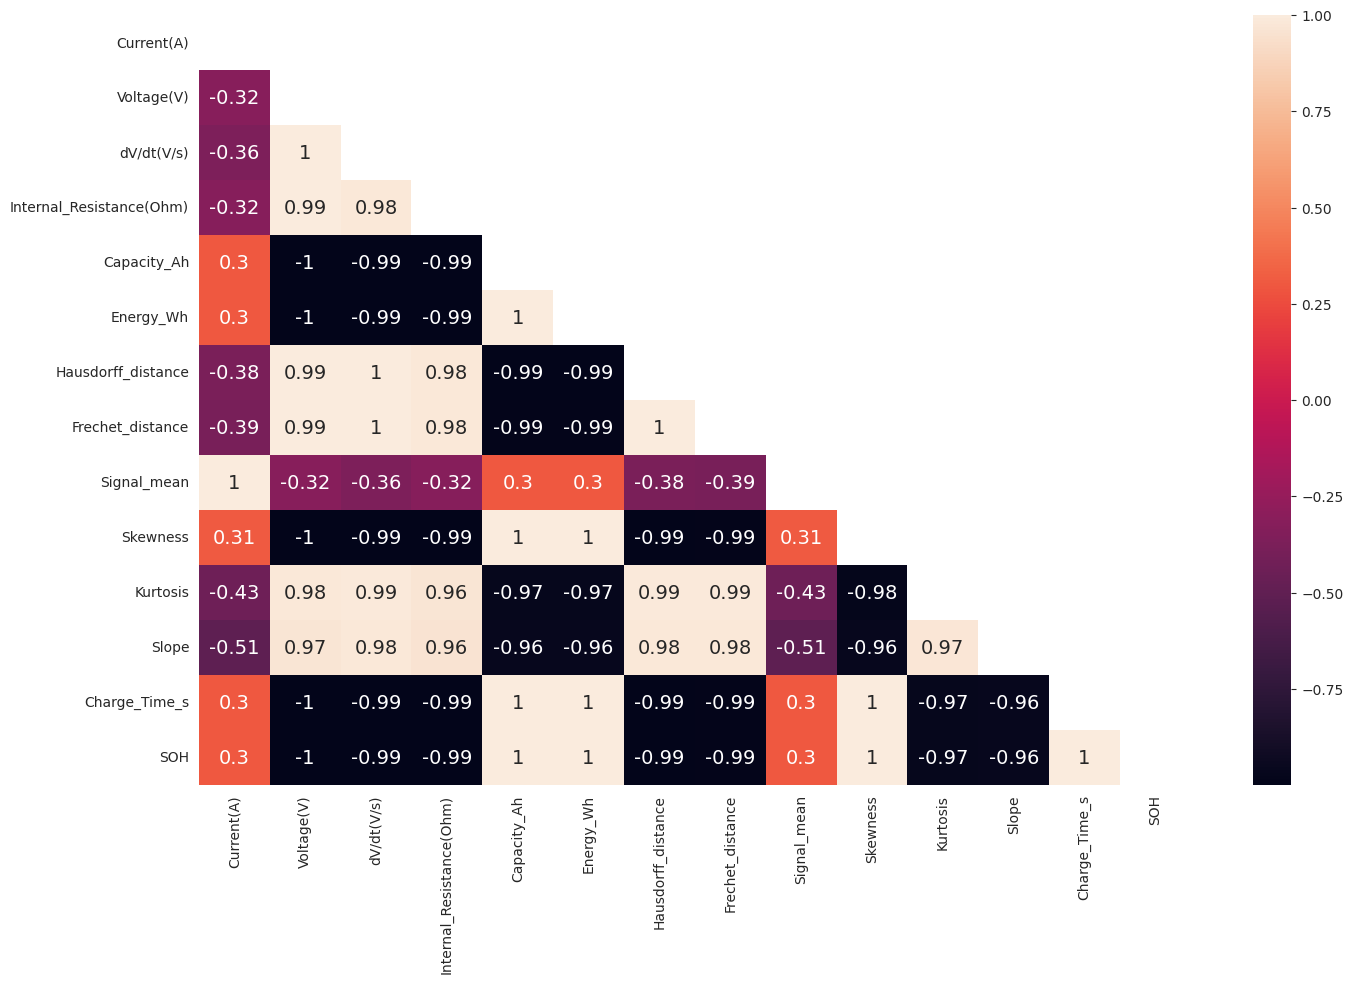

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_train.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# **Multivariable linear regression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Training R-squared score:", lr.score(X_train, y_train))
print("Testing R-squared score:", lr.score(X_test, y_test))

Training R-squared score: 0.9996914595106062
Testing R-squared score: 0.9952968845865895


In [ ]:
pd.DataFrame(data=lr.coef_, index=df_X_train.columns, columns=['coef'] )

,coef
0,0.032047
1,44.597780
2,-0.323950
3,-1.885064
4,-0.018023
5,-0.185964
6,-0.042032
7,-0.003356
8,-0.005757
9,-0.000039


In [ ]:
data_train.columns

Index(['Cycle_Index', 'Current(A)', 'Voltage(V)', 'dV/dt(V/s)',
       'Internal_Resistance(Ohm)', 'Capacity_Ah', 'Energy_Wh',
       'Hausdorff_distance', 'Frechet_distance', 'Signal_mean', 'Skewness',
       'Kurtosis', 'Slope', 'Charge_Time_s', 'SOH', 'Group'],
      dtype='object')

Переведем данные к логарифму для выравнивания



In [ ]:
y_train_log = np.log(df_y_train)
y_test_log = np.log(df_y_test)

In [ ]:
print(y_train_log.skew())
print(y_test_log.skew())

-4.100998444650825
-1.635318466857475


<ipython-input-29-790cb14f41cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_log)
<ipython-input-29-790cb14f41cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_log)


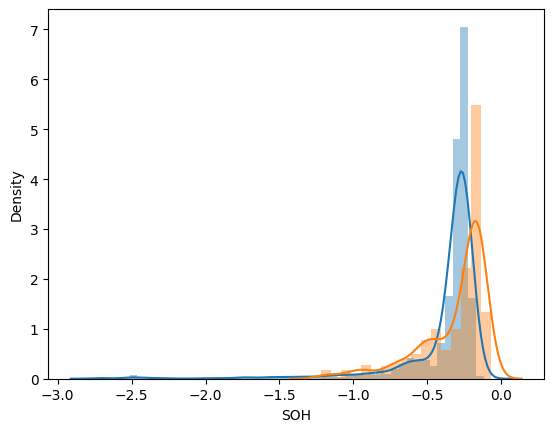

In [ ]:
sns.distplot(y_train_log)
sns.distplot(y_test_log)
plt.show()